<a href="https://colab.research.google.com/github/nika-va/Regression_comparison/blob/main/Regression_Algorithms_Comparison_make_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Algorithms in Comparison

## Dataset 1

In [ ]:
!pip install scikit-learn
!pip install bayesian-optimization
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
# main libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# import algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import PoissonRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error, \
                            r2_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization, UtilityFunction
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson
from sklearn.gaussian_process.kernels import RBF, DotProduct

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X,y = make_regression(n_samples=1000,
                        n_features=30,
                        n_informative=25,
                        n_targets=1,
                        noise=1.0,
                        bias=0.5,
                        random_state=42)

In [ ]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

### Feature Importance

In [ ]:
# decision tree feature importances
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_

Feature: 0, Score: 0.01074
Feature: 1, Score: 0.01644
Feature: 2, Score: 0.03890
Feature: 3, Score: 0.01488
Feature: 4, Score: 0.00615
Feature: 5, Score: 0.02567
Feature: 6, Score: 0.00738
Feature: 7, Score: 0.02283
Feature: 8, Score: 0.00481
Feature: 9, Score: 0.01695
Feature: 10, Score: 0.01036
Feature: 11, Score: 0.08174
Feature: 12, Score: 0.03595
Feature: 13, Score: 0.02394
Feature: 14, Score: 0.09395
Feature: 15, Score: 0.01297
Feature: 16, Score: 0.04478
Feature: 17, Score: 0.07124
Feature: 18, Score: 0.06712
Feature: 19, Score: 0.01656
Feature: 20, Score: 0.03228
Feature: 21, Score: 0.04014
Feature: 22, Score: 0.09650
Feature: 23, Score: 0.01804
Feature: 24, Score: 0.03001
Feature: 25, Score: 0.09807
Feature: 26, Score: 0.01512
Feature: 27, Score: 0.02862
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.01698


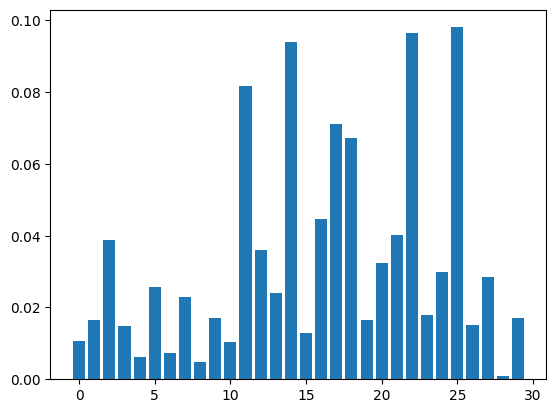

In [ ]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00185
Feature: 1, Score: 0.00351
Feature: 2, Score: 0.04134
Feature: 3, Score: 0.00459
Feature: 4, Score: 0.01071
Feature: 5, Score: 0.01426
Feature: 6, Score: 0.00751
Feature: 7, Score: 0.01323
Feature: 8, Score: 0.00356
Feature: 9, Score: 0.00610
Feature: 10, Score: 0.00402
Feature: 11, Score: 0.08395
Feature: 12, Score: 0.04847
Feature: 13, Score: 0.00486
Feature: 14, Score: 0.08983
Feature: 15, Score: 0.02578
Feature: 16, Score: 0.04191
Feature: 17, Score: 0.06837
Feature: 18, Score: 0.07853
Feature: 19, Score: 0.00941
Feature: 20, Score: 0.03577
Feature: 21, Score: 0.05336
Feature: 22, Score: 0.11229
Feature: 23, Score: 0.00368
Feature: 24, Score: 0.05509
Feature: 25, Score: 0.10809
Feature: 26, Score: 0.02526
Feature: 27, Score: 0.02197
Feature: 28, Score: 0.00206
Feature: 29, Score: 0.02064


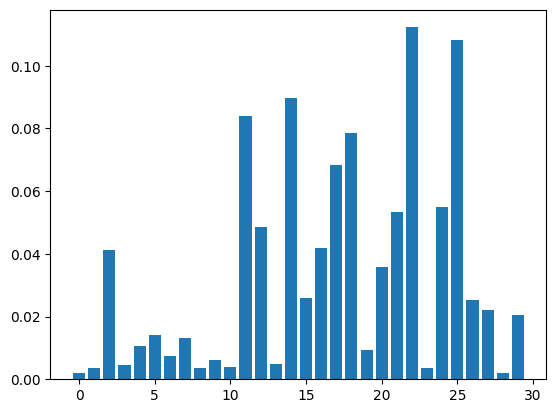

In [ ]:
from xgboost import XGBRegressor

# xgboost feature importances
model = XGBRegressor()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# drop the unimportant features
X = pd.DataFrame(X).drop([4, 6, 8, 28], axis=1)

### Algorithms Comparison with train_test_split

In [ ]:
# Linear Regression/ Polynomial Regression
# SVR
# Decision Tree
# Random Forest
# Ridge/ Lasso Regression
# Poisson Regression
# Gaussian Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
scores_r2 = {}
scores_mae = {}
scores_mse = {}
scores_rmse = {}

In [ ]:
def show_scores():
  print(f'''r2 score: {scores_r2},
mae score: {scores_mae},
mse score: {scores_mse},
rmse score: {scores_rmse}''')

Linear Regression

In [ ]:
lin1 = LinearRegression()
lin1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin1.predict(X_test)

In [ ]:
scores_r2['Linear Regression'] = r2_score(y_pred, y_test)
scores_mae['Linear Regression'] = mean_absolute_error(y_pred, y_test)
scores_mse['Linear Regression'] = mean_squared_error(y_pred, y_test)
scores_rmse['Linear Regression'] = mean_squared_error(y_pred, y_test, squared=False)

Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train.to_numpy())

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = lin2.predict(poly.fit_transform(X_test.to_numpy()));

In [ ]:
scores_r2['Polynomial Regression'] = r2_score(y_pred, y_test)
scores_mae['Polynomial Regression'] = mean_absolute_error(y_pred, y_test)
scores_mse['Polynomial Regression'] = mean_squared_error(y_pred, y_test)
scores_rmse['Polynomial Regression'] = mean_squared_error(y_pred, y_test, squared=False)

Support Vector Machine (SVR)

In [ ]:
param_dist = {'kernel': ['linear', 'sigmoid'],
              'C' : np.linspace(-10, 500, 1000)}

svr = SVR()
random_search = RandomizedSearchCV(
	svr, param_distributions=param_dist, n_iter=25,
	scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=2024
)


In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=25,
                   param_distributions={'C': array([-1.00000000e+01, -9.48948949e+00, -8.97897898e+00, -8.46846847e+00,
       -7.95795796e+00, -7.44744745e+00, -6.93693694e+00, -6.42642643e+00,
       -5.91591592e+00, -5.40540541e+00, -4.89489489e+00, -4.38438438e+00,
       -3.87387387e+00, -3.36336336e+00, -2.85285285e+00, -2.34234234e+00,
       -1.83183183e...
        4.90300300e+02,  4.90810811e+02,  4.91321321e+02,  4.91831832e+02,
        4.92342342e+02,  4.92852853e+02,  4.93363363e+02,  4.93873874e+02,
        4.94384384e+02,  4.94894895e+02,  4.95405405e+02,  4.95915916e+02,
        4.96426426e+02,  4.96936937e+02,  4.97447447e+02,  4.97957958e+02,
        4.98468468e+02,  4.98978979e+02,  4.99489489e+02,  5.00000000e+02]),
                                        'kernel': ['linear', 'sigmoid']},
                   random_state=2024, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
random_search.best_params_

{'kernel': 'linear', 'C': 116.0960960960961}

In [ ]:
svr = random_search.best_estimator_

In [ ]:
y_pred = svr.predict(X_test)

In [ ]:
scores_r2['SVR'] = r2_score(y_pred, y_test)
scores_mae['SVR'] = mean_absolute_error(y_pred, y_test)
scores_mse['SVR'] = mean_squared_error(y_pred, y_test)
scores_rmse['SVR'] = mean_squared_error(y_pred, y_test, squared=False)

Decision Tree

In [ ]:
param_dist = {
    'max_depth':np.arange(1,21).tolist()[0::2],
    'min_samples_split':np.arange(2,11).tolist()[0::2],
    'max_leaf_nodes':np.arange(3,26).tolist()[0::2]
}
random_search = RandomizedSearchCV(
	DecisionTreeRegressor(), param_distributions=param_dist, n_iter=25,
	scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=2024)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'min_samples_split': 2, 'max_leaf_nodes': 5, 'max_depth': 19}

In [ ]:
dt = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes= 5)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
scores_r2['Random Forest'] = r2_score(y_pred, y_test)
scores_mae['Random Forest'] = mean_absolute_error(y_pred, y_test)
scores_mse['Random Forest'] = mean_squared_error(y_pred, y_test)
scores_rmse['Random Forest'] = mean_squared_error(y_pred, y_test, squared=False)

Random Forest

In [ ]:
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
rf = RandomForestRegressor(n_estimators= 1000,
                          min_samples_split= 2,
                          min_samples_leaf= 2,
                          max_features= 'auto',
                          max_depth= 80,
                          bootstrap= True)
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=80, max_features='auto', min_samples_leaf=2,
                      n_estimators=1000)

In [ ]:
# {'n_estimators': 1000,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 80,
#  'bootstrap': True}

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
r2_score(y_pred, y_test)

-0.843218721681992

In [ ]:
scores_r2['Random Forest'] = r2_score(y_pred, y_test)
scores_mae['Random Forest'] = mean_absolute_error(y_pred, y_test)
scores_mse['Random Forest'] = mean_squared_error(y_pred, y_test)
scores_rmse['Random Forest'] = mean_squared_error(y_pred, y_test, squared=False)

Ridge Regression

In [ ]:
RidgeRegression = Ridge()

hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)

RidgeRegression.fit(X_train, y_train)
y_pred = RidgeRegression.predict(X_test)

In [ ]:
scores_r2['Ridge'] = r2_score(y_pred, y_test)
scores_mae['Ridge'] = mean_absolute_error(y_pred, y_test)
scores_mse['Ridge'] = mean_squared_error(y_pred, y_test)
scores_rmse['Ridge'] = mean_squared_error(y_pred, y_test, squared=False)

Lasso Regression

In [ ]:
LassoRegression = Lasso()

hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)

LassoRegressor.fit(X_train, y_train)
y_pred = LassoRegressor.predict(X_test)

In [ ]:
scores_r2['Lasso'] = r2_score(y_pred, y_test)
scores_mae['Lasso'] = mean_absolute_error(y_pred, y_test)
scores_mse['Lasso'] = mean_squared_error(y_pred, y_test)
scores_rmse['Lasso'] = mean_squared_error(y_pred, y_test, squared=False)

Poisson Regressor

In [ ]:
poisson = PoissonRegressor( )
y_train_filtered = y_train[y_train >= 0]
X_train_filtered = X_train[y_train >= 0]

# Train the model with filtered data
poisson_reg = poisson.fit(X_train_filtered, y_train_filtered)
y_pred = poisson_reg.predict(X_test)

In [ ]:
r2_score(y_pred, y_test)

-0.8848643209496023

In [ ]:
y_train_zeroed = np.where(y_train < 0, 0, y_train)

# Train the model with modified data
poisson_reg = poisson.fit(X_train, y_train_zeroed)
y_pred = poisson_reg.predict(X_test)

In [ ]:
scores_r2['Poisson'] = r2_score(y_pred, y_test)
scores_mae['Poisson'] = mean_absolute_error(y_pred, y_test)
scores_mse['Poisson'] = mean_squared_error(y_pred, y_test)
scores_rmse['Poisson'] = mean_squared_error(y_pred, y_test, squared=False)

Gaussian Regression

In [ ]:

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_


309**2 * RBF(length_scale=7.47)

In [ ]:
y_pred = gaussian_process.predict(X_test)


In [ ]:
r2_score(y_pred, y_test)

0.9696892356946684

In [ ]:
scores_r2['Gaussian'] = r2_score(y_pred, y_test)
scores_mae['Gaussian'] = mean_absolute_error(y_pred, y_test)
scores_mse['Gaussian'] = mean_squared_error(y_pred, y_test)
scores_rmse['Gaussian'] = mean_squared_error(y_pred, y_test, squared=False)

In [ ]:
# param_grid = [{
#     "alpha":  [1e-2, 1e3],
#     "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
# }]

In [ ]:
# gaussian = GaussianProcessRegressor()
# gaussian_reg = RandomizedSearchCV(
# 	gaussian, param_distributions=param_grid,
# 	scoring='r2', cv=3, verbose=1, random_state=2024
# )
# gaussian_reg.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=GaussianProcessRegressor(),
                   param_distributions=[{'alpha': [0.01, 1000.0],
                                         'kernel': [RBF(length_scale=0.1),
                                                    RBF(length_scale=10)]}],
                   random_state=2024, scoring='r2', verbose=1)

In [ ]:
# y_pred = gaussian_reg.predict(X_test)

In [ ]:
# r2_score(y_pred, y_test)

0.9006732773634099

Comparing :

In [ ]:
# scores_r2
# scores_mae
# scores_mse
# scores_rmse

{'Linear Regression': 0.9885349680998277,
 'Polynomial Regression': 0.9771186967693709,
 'SVR': 0.9880928712834353,
 'Random Forest': -0.843218721681992,
 'Ridge': 0.9885374157154034,
 'Lasso': 0.9885344876554422,
 'Poisson': -0.17318153840649275,
 'Gaussian': 0.9696892356946684}

Text(0.5, 1.0, 'R2 Scores')

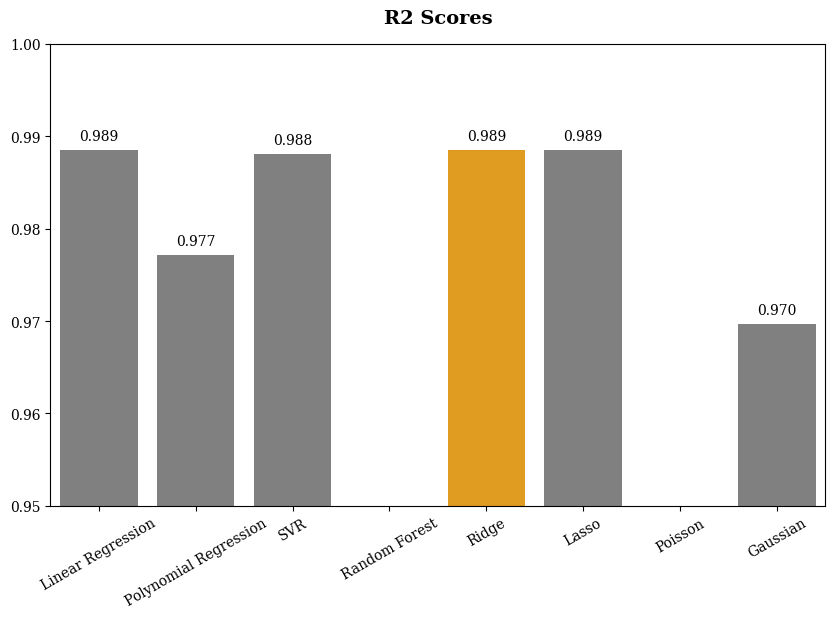

In [ ]:
# plotting R2 scores

plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"

cols = ['grey' if (x < max(scores_r2.values())) else 'orange' for x in scores_r2.values()]
ax = sns.barplot(scores_r2, x=scores_r2.keys(), y=scores_r2.values(), palette=cols)
ax.set_xticklabels(scores_r2.keys(),rotation=30)
plt.ylim(0.95, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_title('R2 Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)


Text(0.5, 1.0, 'MAE Scores')

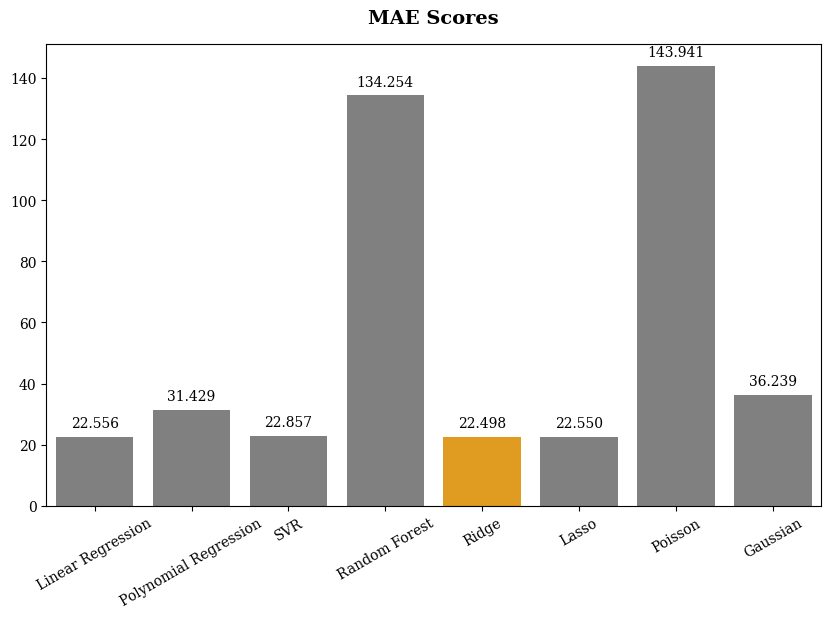

In [ ]:
# plotting MAE scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x > min(scores_mae.values())) else 'orange' for x in scores_mae.values()]
ax = sns.barplot(scores_mae, x=scores_mae.keys(), y=scores_mae.values(), palette=cols)
ax.set_xticklabels(scores_mae.keys(),rotation=30)
# plt.ylim(0.95, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('MAE Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'MSE Scores')

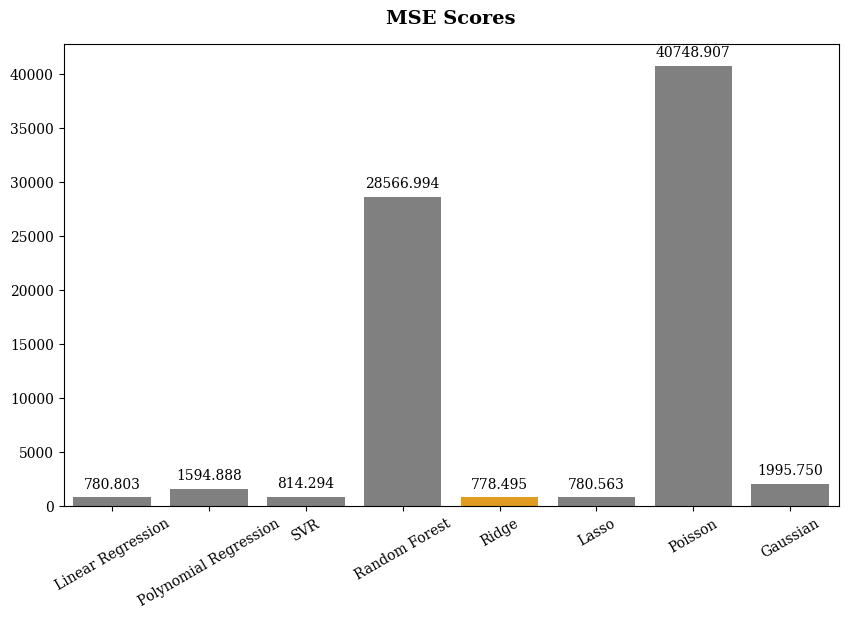

In [ ]:
# plotting MSE scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x > min(scores_mse.values())) else 'orange' for x in scores_mse.values()]
ax = sns.barplot(scores_mse, x=scores_mse.keys(), y=scores_mse.values(), palette=cols)
ax.set_xticklabels(scores_mse.keys(),rotation=30)
# plt.ylim(0.95, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('MSE Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'RMSE Scores')

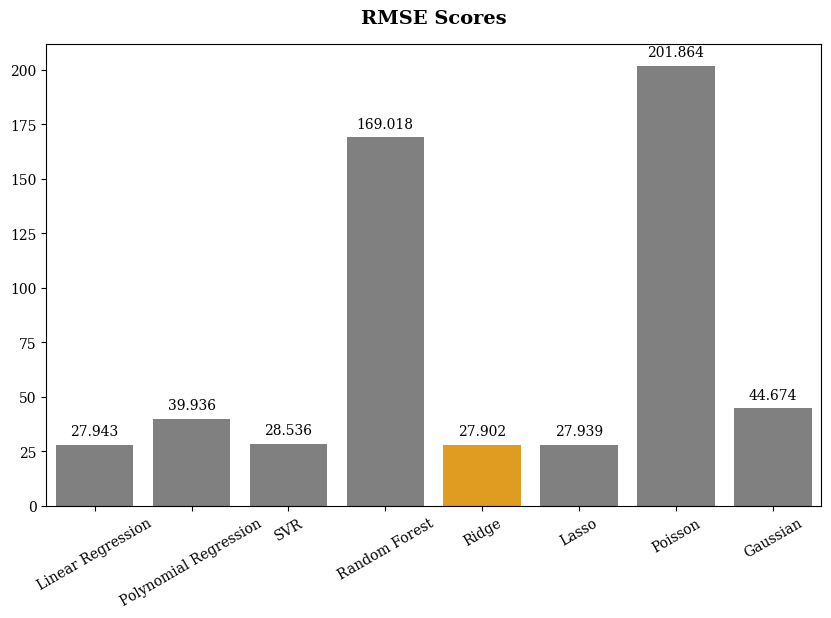

In [ ]:
# plotting RMSE scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x > min(scores_rmse.values())) else 'orange' for x in scores_rmse.values()]
ax = sns.barplot(scores_rmse, x=scores_rmse.keys(), y=scores_rmse.values(), palette=cols)
ax.set_xticklabels(scores_rmse.keys(),rotation=30)
# plt.ylim(0.95, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('RMSE Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)